# Generating Maps

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%205/images/2000_census_population_density_map_by_state.png" width = 600> 

### Datasets:

Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data


In [52]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd 
import folium as fo
import json

In [3]:
filepath = r"C:\Users\QXJ\Desktop\IBM\Data visulization\Canada_clean.csv" 
df = pd.read_csv(filepath, index_col = False)

In [4]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [8]:
df.shape

(195, 39)

In [5]:
# create a list of years 
years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and load it.


In [6]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [7]:
# import gesojson map file
import geojson

In [32]:
import requests
json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
resp = requests.get(json_url)
world_geo=resp.text
world_geo

'{"type":"FeatureCollection","features":[\n{"type":"Feature","properties":{"name":"Afghanistan"},"geometry":{"type":"Polygon","coordinates":[[[61.210817,35.650072],[62.230651,35.270664],[62.984662,35.404041],[63.193538,35.857166],[63.982896,36.007957],[64.546479,36.312073],[64.746105,37.111818],[65.588948,37.305217],[65.745631,37.661164],[66.217385,37.39379],[66.518607,37.362784],[67.075782,37.356144],[67.83,37.144994],[68.135562,37.023115],[68.859446,37.344336],[69.196273,37.151144],[69.518785,37.608997],[70.116578,37.588223],[70.270574,37.735165],[70.376304,38.138396],[70.806821,38.486282],[71.348131,38.258905],[71.239404,37.953265],[71.541918,37.905774],[71.448693,37.065645],[71.844638,36.738171],[72.193041,36.948288],[72.63689,37.047558],[73.260056,37.495257],[73.948696,37.421566],[74.980002,37.41999],[75.158028,37.133031],[74.575893,37.020841],[74.067552,36.836176],[72.920025,36.720007],[71.846292,36.509942],[71.262348,36.074388],[71.498768,35.650563],[71.613076,35.153203],[71.115

In [13]:
# create a plain world map
world_map = fo.Map(location=[0, 0], zoom_start=2)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [22]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

C:\Users\QXJ\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


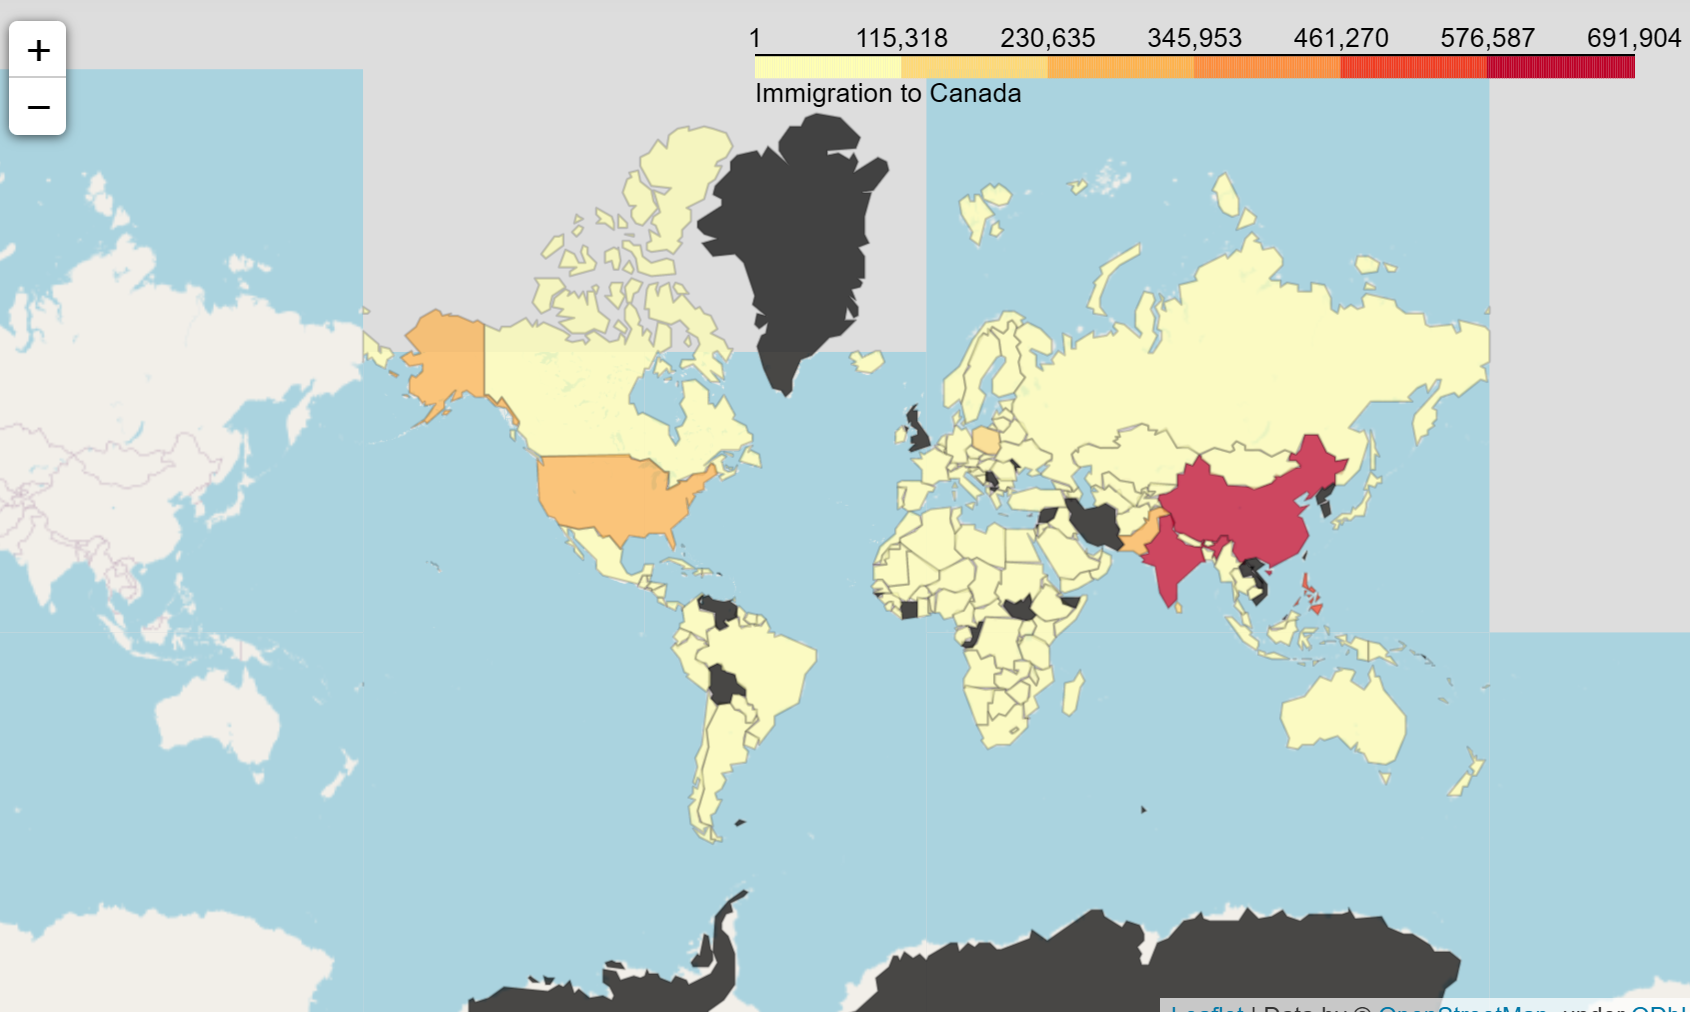

*-> As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.*

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [23]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df['Total'].min(),
                              df['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = fo.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

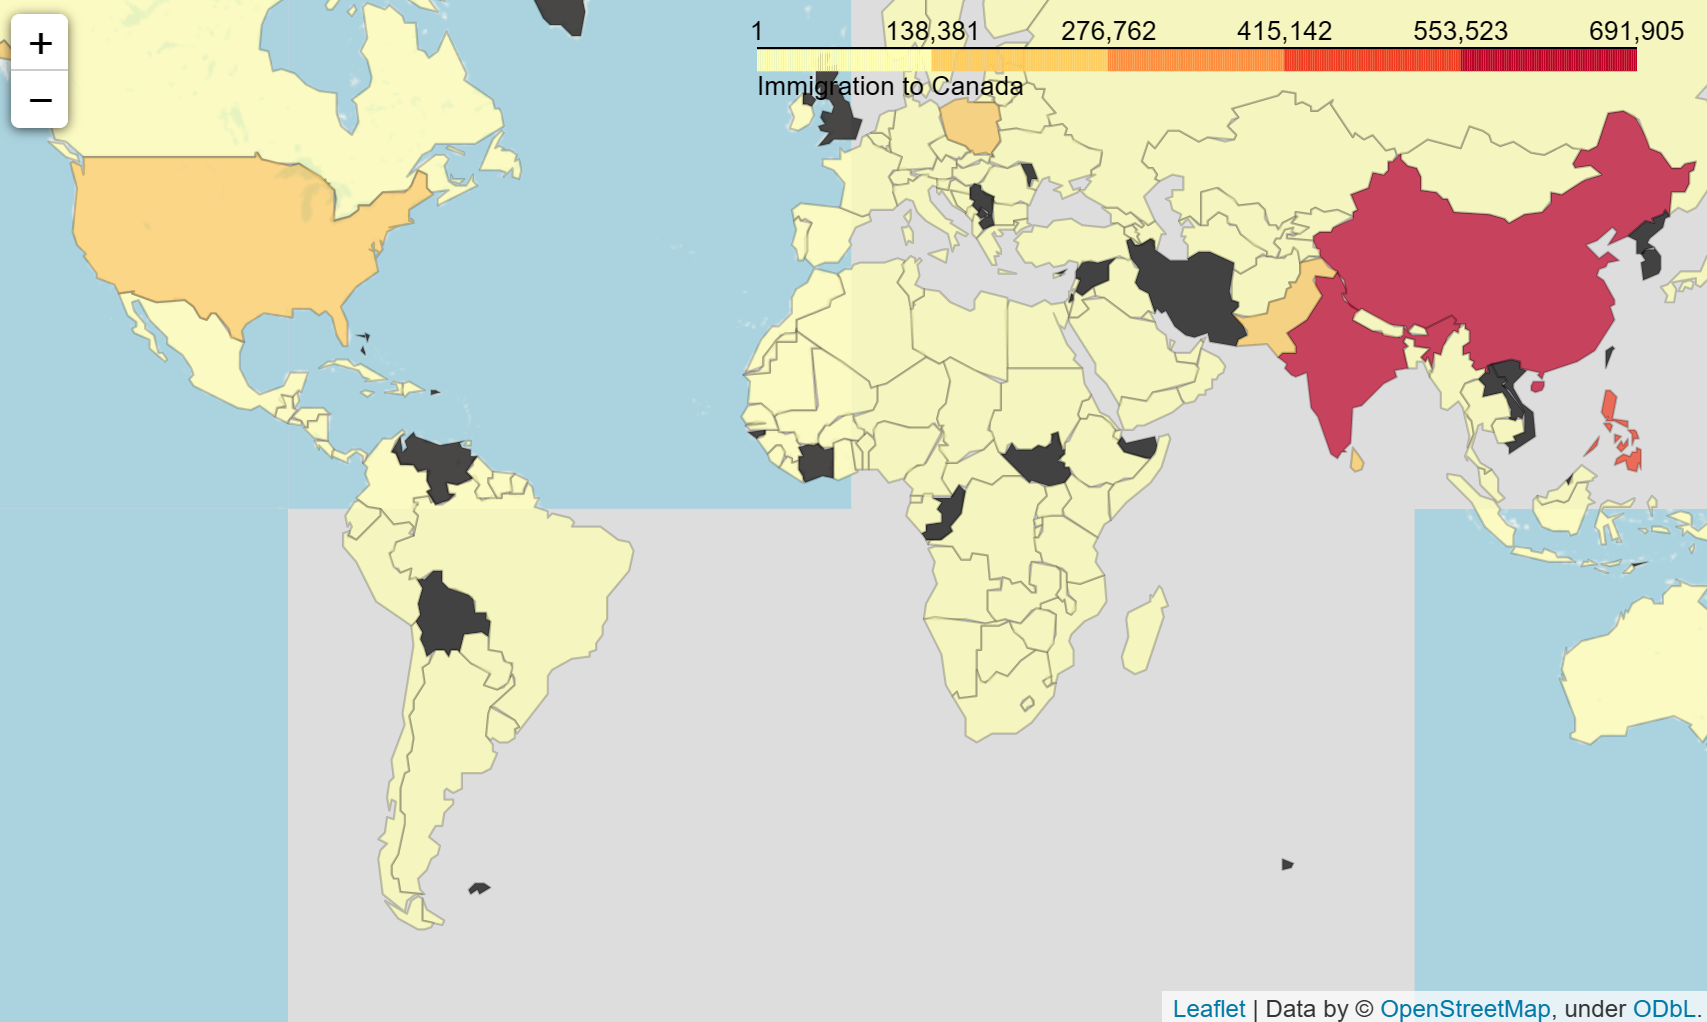

In [26]:
df['Total'].astype({"Total":int})
df_tot = df[['Country','Total']]

In [27]:
df_tot.dtypes

Country    object
Total       int64
dtype: object

In [28]:
df_tot.head()

,Country,Total
0,India,691904
1,China,659962
2,United Kingdom of Great Britain and Northern I...,551500
3,Philippines,511391
4,Pakistan,241600


## Plot Choropleth map

In [44]:
world_map = fo.Map(location=[0, 0], zoom_start=2)

fo.Choropleth(geo_data = world_geo, name = "choropleth", data = df_tot, 
            columns = ["Country","Total"], 
            key_on = 'feature.properties.name',
            fill_color = "YlOrRd",
            fill_opacity = 0.7, 
            line_opacity = 0.5,
            legend_name = "Number of Immigrants to Canada",
            legend_color = 'White'
            ). add_to(world_map)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

color_scale = fo.features.GeoJson(
      world_geo,
      style_function=style_function, 
      control=False,
      highlight_function=highlight_function,
    # add tooltip 
      tooltip = fo.features.GeoJsonTooltip(
      fields = ["name"], 
      aliases = ["Country:"],
      style =("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;" ))
      )

world_map.add_child(color_scale)
world_map.keep_in_front(color_scale)
# add layer control 
fo.LayerControl().add_to(world_map)
world_map

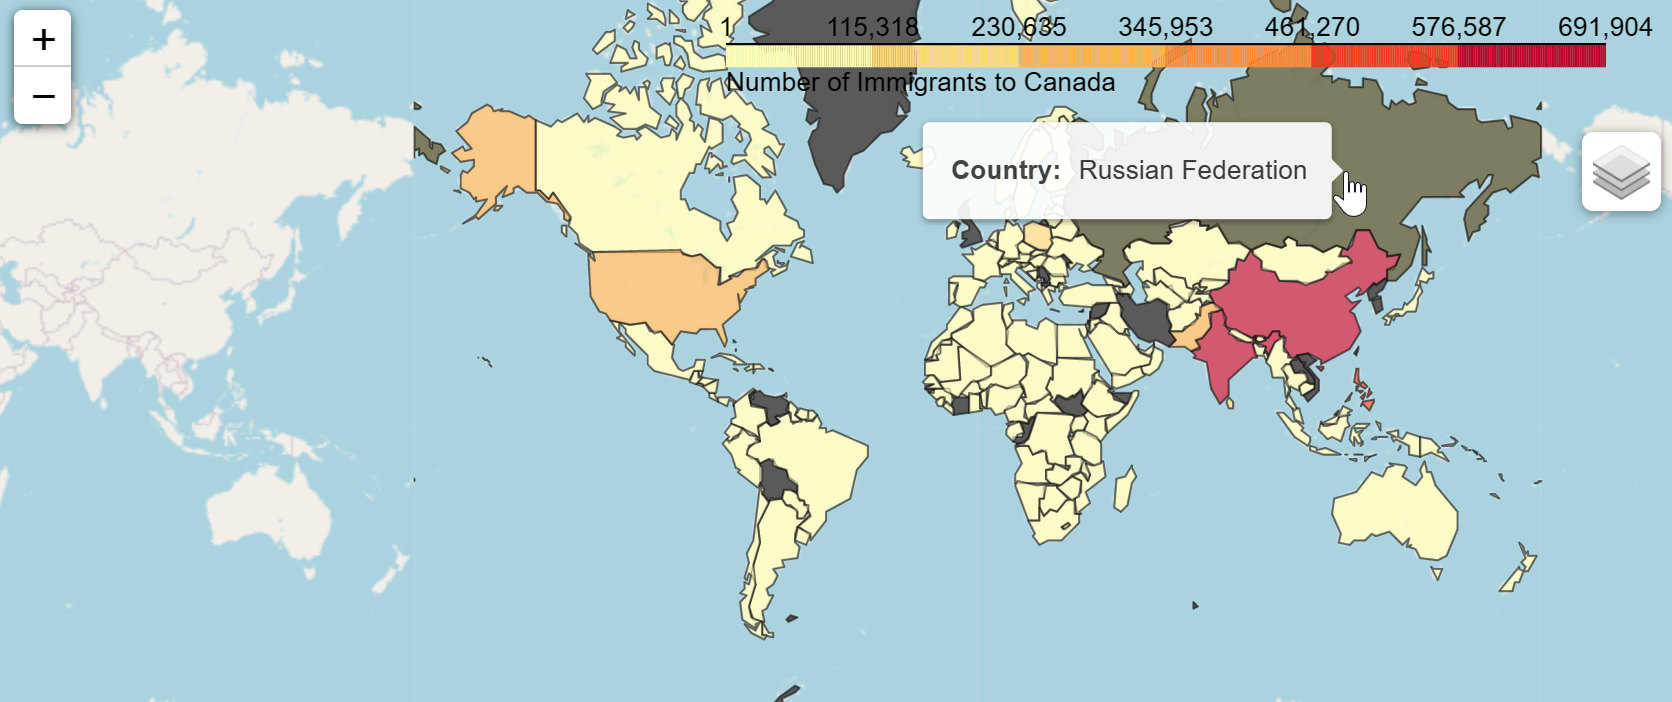